In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
q_e = 1.60217662e-19     # Elementary Charge (coulomb)
m_e = 9.10938356e-31     # Electron Mass (kg)
c = 299792458            # Speed of light (m)
pi = np.pi               # Math constant Pi
eps_o = 8.8541878128e-12 # Permittivity of free space (m^-3 kg^-1 s^4 A^2)



# Gamma Ray Spectroscopy

Janurary 13, 2020 (Pre Week 1) Jason Peng

## Introduction

Measuring the energy of particles is crucial to many physics experiements. This is usually done by looking at the interaction of the particles with a medium that is well understood. A common apparatus used is a scintillator, which can convert gamma radiation to lower-energy photons, which can be easily detected by phototubes. Phototubes can then covert the low energy photons into electrical signals that are easier to process. 

Scintillator : a material that fluoresces when struck by a charged particle or high-energy photon. (Google definitions)

<figure>
    <img  src="images/phototube.gif" alt="phototube" width="200">
    <center><figcaption>Phototube taken from <a href="https://kids.britannica.com/students/article/photoelectric-device/276409/286736-toc">here</a></figcaption></center>
</figure>


## Objective

To use known sources of gamma ray energies (from $^{137}\text{Cs, }^{109}\text{Cd, }^{60}\text{Co}$) to calibrate our detection system and to determine the energies of unknown sources ($^{54}\text{Mn, }^{22}\text{Na, }^{133}\text{Ba}$). The calibration will be done through identifying the photopeak of each spectrum, and understanding of the underlying physics (photoelectric effect, compton scattering, electron-positron pair production)

## Background

Gamma rays from the source will hit the scintillator to be coverted to low energy photons. The photons will be collected by the phototube and converted to electric current. The overall effciency for converting gamma ray energy to electric current is on the order of 0.15%. Each gamma ray will therefore produce an electrical pulse of amplitude proportional the to the energy absorbed by the detectors. Below are some processes of gamma ray conversion that results in different energy absorbed.

Here photopeak will refer to amplitude created when all of the energy is absorbed. 

In [3]:
r_o = 1/(4*pi*eps_o) * q_e**2/(m_e*c**2)     # Classical radius of Electron (m)
sigma_T = (8*pi/3) * (q_e**2/(m_e*c**2))**2  # 
e_rest = m_e*c**2                          # Electron rest mass (eV c^-2) 

### Photoelectric effect

Photon is completely absorbed. This process will create a spike at the photopeak.

In [4]:
Z = 11 # Atomic number of Sodium 
sigma_p = lambda e_gamma : (sigma_T * Z**5/137**5) * 8**(1/2) * (e_gamma/ e_rest)**(-7/2) 
sigma_p2 = lambda gamma : (sigma_T * Z**5/137**5) * 8**(1/2) * (gamma)**(-7/2) 


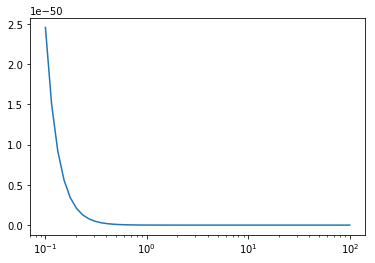

In [5]:
xs = np.logspace(-1, 2)
plt.semilogx(xs, sigma_p2(xs))

### Compton effect

Photon bounces off and only transfer part of the energy. The photon could eventually leave the scintillator with some energy, so this process will sometimes be less than the photospeak

In [6]:
def sigma_c2(gamma):
    gamma = np.array(gamma)
    large_gamma = gamma > 1
    small_gamma = ~large_gamma
    
    output = np.zeros_like(gamma)
    output[small_gamma] = sigma_T * ( 1 - 2*gamma[small_gamma] + 26/5*gamma[small_gamma]**2)
    output[large_gamma] = 3/8 * sigma_T * 1/gamma[large_gamma] * (np.log(2*gamma[large_gamma])-1/2)
    
    return output

def sigma_c(e_gamma):
    return sigma_c2(e_gamma / e_rest)

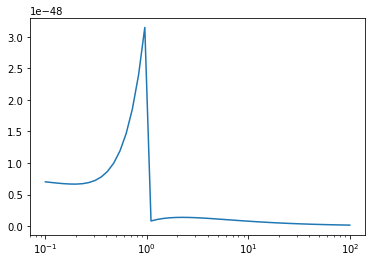

In [7]:
plt.semilogx(xs, sigma_c2(xs))

### Electron-Positron Pair Production

Some energy goes into excitation of electrons, the rest is converted to two gamma rays each with 0.511MeV. Depending on whether the gamma rays is absorbed, the signal could be at the photopeak, 0.511 MeV or 1.022Mev less than the photopeak.

In [8]:
sigma_pair = Z**2/137 * r_o**2 * (28/9 * np.log(183/Z**(1/3)) - 2/27) # Only if gamma ~ 1000
print(sigma_pair)

9.570838379872431e-29


### Backscatter

Photon pass through the detector, but bounce of the enclosure and back into the detector. 

### Emission of positrons

The positron of energy 0.511MeV is created by beta decay of the source. The positron could annihilate with an electron in the detector or the original source.


## Questions

* With regards to the Compton scattering process. The corresponding spectrum is continuous, and is characterized by a high-energy edge. Why?
    * Perhaps something to do with the photoelectric work function?
* With regards to backscattering. What sort of spectrum would you expect from such events?
    * A fix amount of energy radiated back by the enclosure, assuming the energy that bounced back is completely absorbed, this will create a secondary peak. 
* With regards to emission of positrons by the source. What features would you expect these events to produce in the final spectra?
    * if the positron is absorbed by the source, then nothing is detected. If the positron is absorbed by the detector, then an electron is lost. Perhaps, a negative pulse will be detected.

## Procedure

Copied from the Lab Manual

1. The power supply voltage should be at 1300 V. Adjust the amplifier gain such that the 60Co source gives a maximum signal that is not off-scale (if the spectrum goes off the right side of the screen you need to turn down the gain). Check your signals with an oscilloscope and familiarize yourself with the Personal Computer Analyzer software.
2. Record spectra from the 137Cs, 109Cd, and 60Co sources. Using the known energies for the gamma rays emitted from these sources (chart on the west wall of the laboratory or a reference), generate a calibration curve for the gamma ray energy in terms of the channel number.
3. With this calibration, determine the energies of peaks observed in the 54Mn, 22Na and 133Ba spectra, and compare with their expected values. 
4. For all of the spectra, **identify as many of the features** as possible. You will need to determine and use the relationship between the energies of the **Compton edge, photopeak and backscatter peak**. Report the **width of each photopeak**.
5. For the 137Cs source, determine the efficiency of this detection system. You will need to record the date and initial activity of the source.

## Week 1


Jan 14. 2020 Jason Peng

### Addition notes on Procedure

* Read the Instructions to set up the UCS30 spectrometer.
* Turn spectrometer on, check pos is green
* launch ucs30 software on computer
* Load setup file
* check mode is pha (amp in)
* change setting for amp/hv/adc
    * Update according to the setting in the instruction booklet
    * Change course gain to 4, fine gain to 1.2 (Different from the instruction)
    * Don't change the LLD and ULD
* Place source in the detector with sticker facing away from the detector
* Hit green diamond to start
* Run for 5 minutes to gather data
* Save the spectrum file
* Save the csv

### Logbook of events during the lab

* Read safety instructions
* Receive radioactive material
* Read instructions for UCS30
    * Have issues running experiement
    * Loading the setup file seems to fix the issue
* Record format is element_coursegain_finegain_additionalInfo
* Record results for co60 with sticker away from detector
* Record results for co60 with sticker facing detector
* Record results for cd109 with sticker away from detector
* Record results for mn54 with sticker away from detector
* Record results for cs137 (borrowing material from other experiement)
* Record results for ba133 (borrowing material from other experiement)
* Record results for na22 
* Find gamma ray energy from online and in class

### Additional Background

Gamma ray energy according to Wikipedia

| Element | MeV | reference | 
| - | - | - |
| cs137 | 0.6616| wikipedia |
| co60 | 1.1732,1.3325| wikipedia |
| cd109 | 0.088 | chart in class |
| mn54 | 0.834848  | [chart online](https://www-nds.iaea.org/relnsd/vcharthtml/VChartHTML.html) |
| ba133 | 	0.0531622, 0.0796142, 0.0809979, 0.1606120, 0.2232368, 0.2763989, 0.3028508, 0.3560129, 0.3838485  | chart online | 
| na22 | 1.274537| chart online |




## Revised answers to questions

* With regards to the Compton scattering process. The corresponding spectrum is continuous, and is characterized by a high-energy edge. Why?
    * There is maximum possible amount of transfer energy possible according to kinematic equations. (This occurs when the particle bounces back at 180 degrees) So the compton scattering can only deposit up to a certain maximum energy.
* With regards to backscattering. What sort of spectrum would you expect from such events?
    * Backscattering is just be compton scattering in the enclosure. Except the photons, would need to bounce back at almost 180 degrees into get back into the detector. Therefore, backscattering peak + compton edge should be around the photopeak. Since the backscattering peak is the energy that is not absorbed after the maximum possible is absorbed by the enclosure.
* With regards to emission of positrons by the source. What features would you expect these events to produce in the final spectra?
    * if the positron is absorbed by the source, then nothing is detected. If the positron is absorbed by the detector, then an electron is lost. Perhaps, a negative pulse will be detected.

# Post week 1 

Jan 19. 2020 Jason Peng

Will be working on fitting the spectrums gathered during the lab

## Analysis

Plotting the experiemental data and finding peaks within it

In [9]:
from scipy.signal import find_peaks
import csv
import os

In [10]:
def read_csv(file):
    data = []
    with open(file, 'r') as csvfile:
        reader = csv.reader(csvfile)
        is_data = False  
        for row in reader:
            if is_data:
                data.append([int(row[0]), int(row[2])]) 
            else:
                is_data = row == ['Channel', 'Energy', 'Counts']
    data = np.array(data)
    return data

In [11]:
data_folder = "data/week1/"

element_to_csv = {
    "co":os.path.join(data_folder, 'co60_cg4_fg12.csv'),
    "cs":os.path.join(data_folder, 'cs137_cg4_fg12.csv'),
    "cd":os.path.join(data_folder, 'cd109_cg4_fg12.csv'),
    "mn":os.path.join(data_folder, 'mn54_cg4_fg12.csv'),
    "ba":os.path.join(data_folder, 'ba133_cg4_fg12.csv'),
    "na":os.path.join(data_folder, 'na22_cg4_fg12.csv'),
}

element_to_data = {}
for k,v in element_to_csv.items():
    element_to_data[k] = read_csv(v)

co [  25   97  277 1062 1382 1564]
cs [  31   91  241  524  805 1263 1440]
cd [ 23 109 165 397]
mn [ 25  86 248 712 998]
ba [ 29  99 433]
na [  24   94  224  633  927  980 1539]


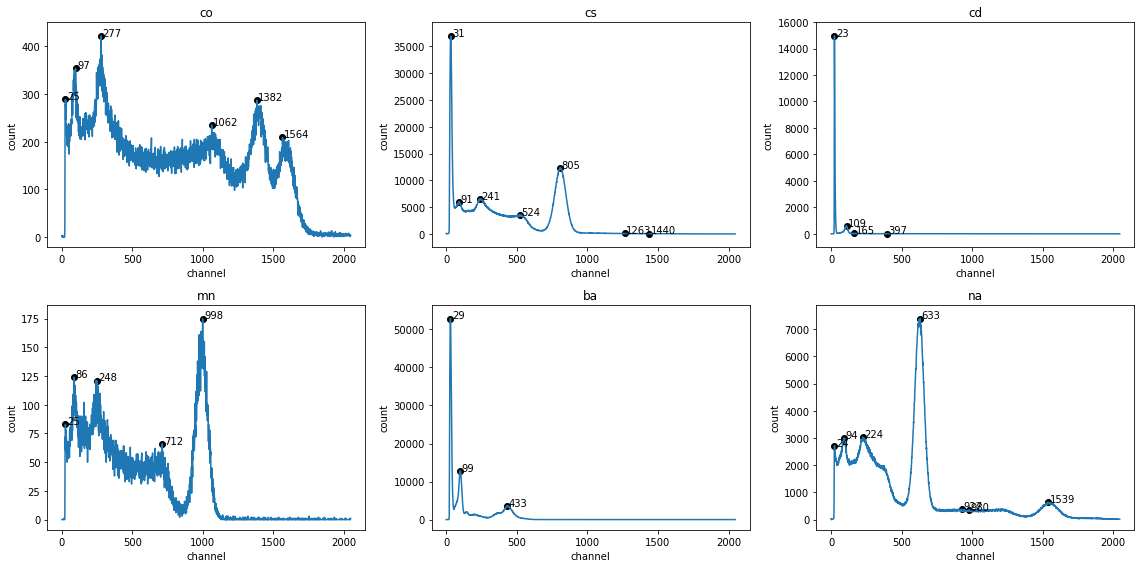

In [12]:
def customplot(ax, element):
    data = element_to_data[element]
    ax.plot(data[:,0], data[:,1])
    peaks, _ = find_peaks(data[:,1], prominence=10, width=4, distance=50)
    ax.scatter(peaks, data[:,1][peaks], c='k')
    
    ax.set_title(element)
    ax.set_xlabel('channel')
    ax.set_ylabel('count')
    print(element, peaks)
    
    for peak in peaks:
        ax.annotate(peak, (peak+10, data[peak,1]))
    
    return peaks.tolist()
    
element_to_peaks = {}    

fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(16,8))

element_to_peaks['co'] = customplot(axs[0,0], 'co')
element_to_peaks['cs'] = customplot(axs[0,1], 'cs')
element_to_peaks['cd'] = customplot(axs[0,2], 'cd')
element_to_peaks['mn'] = customplot(axs[1,0], 'mn')
element_to_peaks['ba'] = customplot(axs[1,1], 'ba')
element_to_peaks['na'] = customplot(axs[1,2], 'na')

fig.tight_layout()

The find peak algorithm is not 100% accurate. There seems to be extra and missing peaks. The extra peaks occur while the function is relatively flat (Cs, Cd, Na). This is most likely just noise being detected. At the same time, the edges (possibly from back scattering) in Na seems to have not been detected.

Will manually label the peaks

In [13]:
element_to_peaks = {
'co': [25, 97, 277, 1062, 1382, 1564],
 'cs': [31, 91, 241, 524, 805],
 'cd': [23, 109],
 'mn': [25, 86, 248, 712, 998],
 'ba': [29, 99, 433],
 'na': [24, 94, 224, 380, 633, 1215, 1539]
}

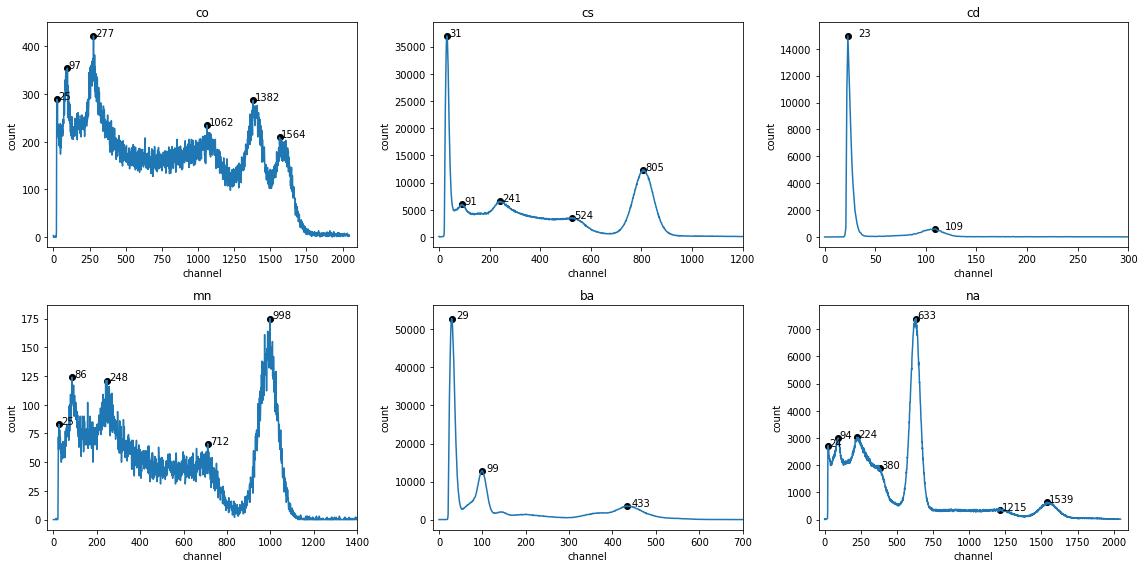

In [14]:
def customplot(ax, element, xmax=2100):
    data = element_to_data[element]
    peaks = element_to_peaks[element]
    
    ax.plot(data[:,0], data[:,1])
    ax.scatter(peaks, data[:,1][peaks], c='k')
    
    ax.set_title(element)
    ax.set_xlabel('channel')
    ax.set_ylabel('count')
    ax.set_xlim([-xmax/50,xmax])
    
    for peak, annotation in zip(peaks, peaks):
        ax.annotate(annotation, (peak+10, data[peak,1]))

fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(16,8))

customplot(axs[0,0], 'co')
customplot(axs[0,1], 'cs', 1200)
customplot(axs[0,2], 'cd', 300)
customplot(axs[1,0], 'mn', 1400)
customplot(axs[1,1], 'ba', 700)
customplot(axs[1,2], 'na')

fig.tight_layout()

Now we try to fit the photopeak

In [15]:
scale = 1200

element_to_photopeaks = {
 'co': [1.1732,1.3325],
 'cs': [0.6616],
 'cd': [0.088],
 'mn': [0.834848],
 'ba': [0.0531622, 0.0796142, 0.0809979, 0.1606120, 0.2232368, 0.2763989, 0.3028508, 0.3560129, 0.3838485],
# 'ba': [0.0796142, 0.0809979, 0.3560129, 0.3838485],
 'na': [1.274537]
}

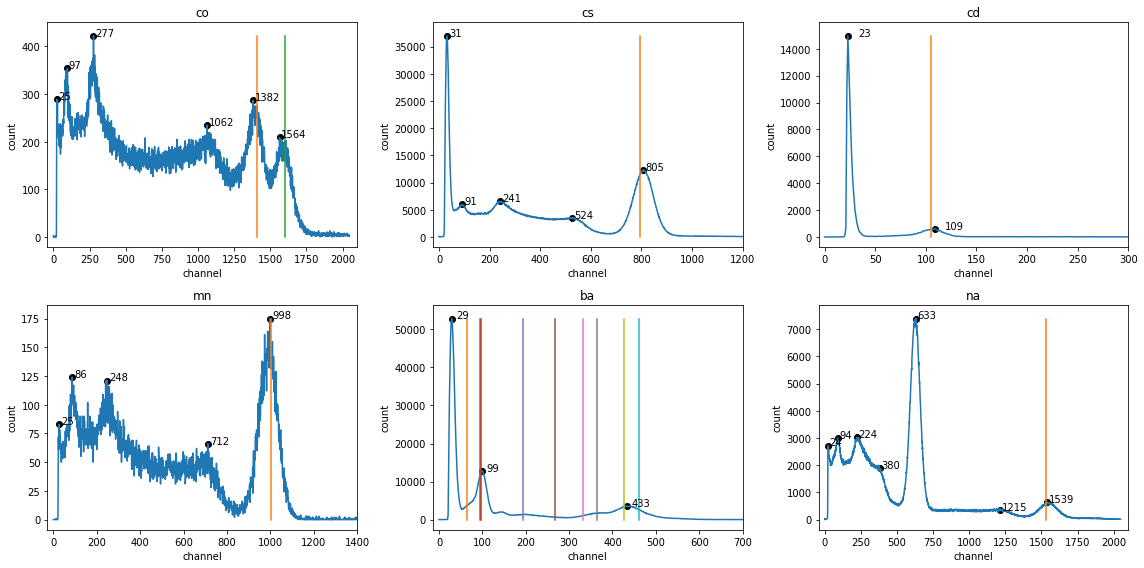

In [16]:
def customplot(ax, element, xmax=2100):
    data = element_to_data[element]
    peaks = element_to_peaks[element]
    photopeaks = element_to_photopeaks[element]
    
    ax.plot(data[:,0], data[:,1])
    ax.scatter(peaks, data[:,1][peaks], c='k')
    
    ymax = max(data[:,1])
    for photopeak in photopeaks:
        ax.plot([photopeak*scale,photopeak*scale], [0,ymax])
    
    ax.set_title(element)
    ax.set_xlabel('channel')
    ax.set_ylabel('count')
    ax.set_xlim([-xmax/50,xmax])
    
    for peak, annotation in zip(peaks, peaks):
        ax.annotate(annotation, (peak+10, data[peak,1]))

fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(16,8))

customplot(axs[0,0], 'co')
customplot(axs[0,1], 'cs', 1200)
customplot(axs[0,2], 'cd', 300)
customplot(axs[1,0], 'mn', 1400)
customplot(axs[1,1], 'ba', 700)
customplot(axs[1,2], 'na')

fig.tight_layout()

It seems scaling the given photopeaks (Co, Cs, Cd) by 1200 seems to correspond to photopeaks pretty accurately (1200 Channel = 1 MeV). Using the scaling, we can also see that the unknown photopeak (Mn, Ba, Na) observed matches values gathered from online sources.

Calculating the compton edge. This is when the most amount of energy can be deposited in the detector.

From equation 4.11 in the lab manual, we have 

$$ \frac{1}{E_o} - \frac{1}{E_i} = \frac{1}{mc^2}(1-\cos\theta)$$

Here, the most amount of energy transferred when $E_o$ is small. Then rearranging some algebra

$$ E_o = \frac{1}{ \frac{1}{E_i} + \frac{1}{mc^2}(1-\cos\theta)} = \frac{E_i}{ 1 + \frac{E_i}{mc^2}(1-\cos\theta)}$$

We see that the smallest energy is when $1-\cos\theta = 2$, or when $\theta = 180^\circ$. Then the total transferred energy given by $E_T = E_i - E_o$ can be written as: 

$$E_T = E_i (1 - \frac{1}{ 1 + \frac{2E_i}{mc^2}})$$

Text(0.5, 1.0, 'Compton Edge')

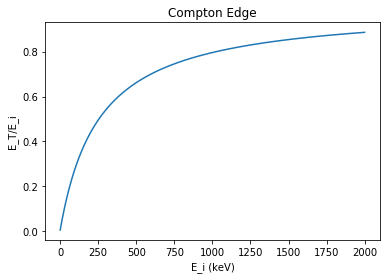

In [17]:
eTransfer = lambda eIn : eIn * (1 - 1/( 1 + 2 * eIn / (m_e * c**2)))

eIn = np.arange(1, 2000)*1000*q_e # From 1 to 2000 KeV in joules
eT = eTransfer(eIn)

plt.plot(np.arange(1, 2000), eT/eIn)

plt.xlabel("E_i (keV)")
plt.ylabel("E_T/E_i")

plt.title("Compton Edge")

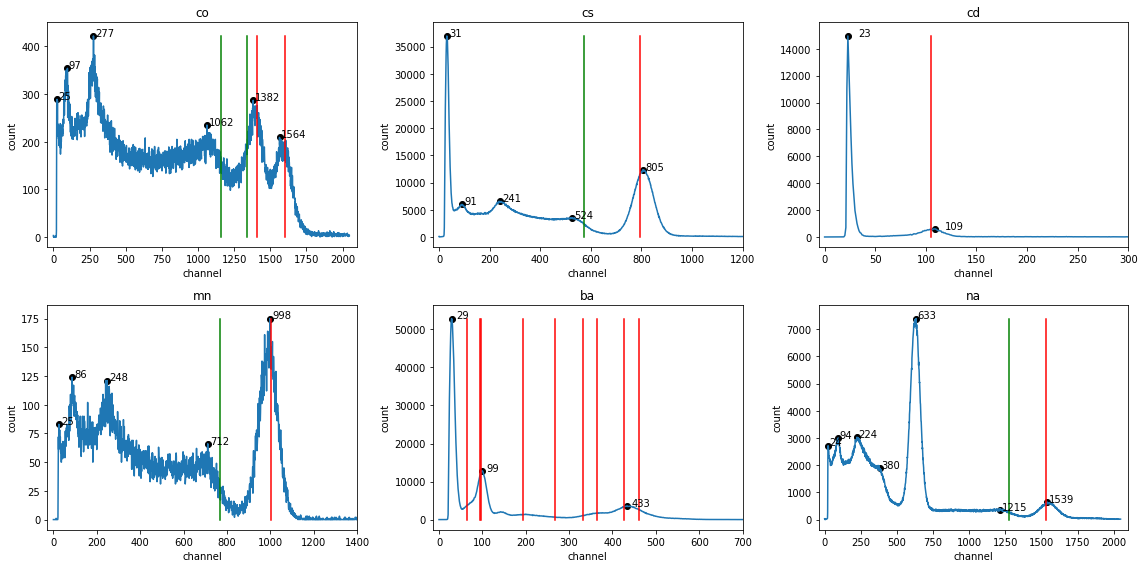

In [18]:
def customplot(ax, element, xmax=2100, compton=False):
    data = element_to_data[element]
    peaks = element_to_peaks[element]
    photopeaks = element_to_photopeaks[element]
    
    ax.plot(data[:,0], data[:,1])
    ax.scatter(peaks, data[:,1][peaks], c='k')
    
    ymax = max(data[:,1])
    for photopeak in photopeaks:
        ax.plot([photopeak*scale,photopeak*scale], [0,ymax], c='r')
        
        if compton:
            energy = photopeak * 1e6 * q_e 
            edge = eTransfer(energy) / (1e6 * q_e)
            ax.plot([edge*scale,edge*scale], [0,ymax], c='g')
    
    ax.set_title(element)
    ax.set_xlabel('channel')
    ax.set_ylabel('count')
    ax.set_xlim([-xmax/50,xmax])
    
    for peak, annotation in zip(peaks, peaks):
        ax.annotate(annotation, (peak+10, data[peak,1]))

fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(16,8))

customplot(axs[0,0], 'co', compton=True)
customplot(axs[0,1], 'cs', 1200, compton=True)
customplot(axs[0,2], 'cd', 300)
customplot(axs[1,0], 'mn', 1400, compton=True)
customplot(axs[1,1], 'ba', 700)
customplot(axs[1,2], 'na', compton=True)

fig.tight_layout()

Here red lines are the photopeaks and the green lines are the compton edge

backscattering peak should be at photopeak - compton edge. So we will be plotting it

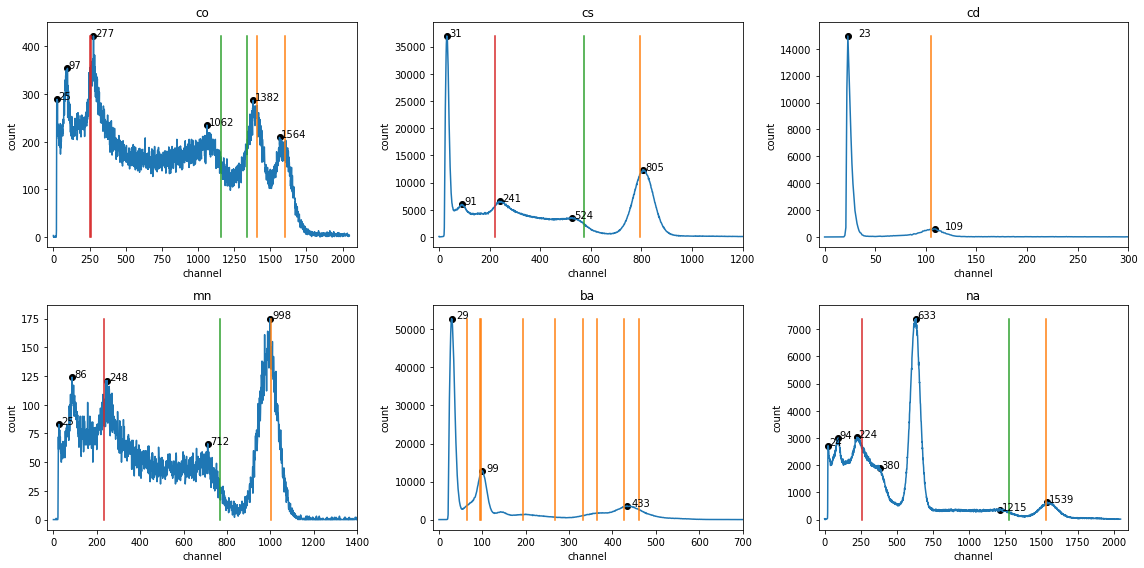

In [19]:
def customplot(ax, element, xmax=2100, compton=False):
    data = element_to_data[element]
    peaks = element_to_peaks[element]
    photopeaks = element_to_photopeaks[element]
    
    ax.plot(data[:,0], data[:,1])
    ax.scatter(peaks, data[:,1][peaks], c='k')
    
    ymax = max(data[:,1])
    for photopeak in photopeaks:
        ax.plot([photopeak*scale,photopeak*scale], [0,ymax], c='C1')
        
        if compton:
            energy = photopeak * 1e6 * q_e 
            edge = eTransfer(energy) / (1e6 * q_e)
            ax.plot([edge*scale,edge*scale], [0,ymax], c='C2')
            
            backscatter = photopeak - edge
            ax.plot([backscatter*scale,backscatter*scale], [0,ymax], c='C3')

    
    ax.set_title(element)
    ax.set_xlabel('channel')
    ax.set_ylabel('count')
    ax.set_xlim([-xmax/50,xmax])
    
    for peak, annotation in zip(peaks, peaks):
        ax.annotate(annotation, (peak+10, data[peak,1]))

fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(16,8))

customplot(axs[0,0], 'co', compton=True)
customplot(axs[0,1], 'cs', 1200, compton=True)
customplot(axs[0,2], 'cd', 300)
customplot(axs[1,0], 'mn', 1400, compton=True)
customplot(axs[1,1], 'ba', 700)
customplot(axs[1,2], 'na', compton=True)

fig.tight_layout()

Here orange lines are the photopeaks, the green lines are the compton edge and red lines are the photopeak

Perhaps the backscattering could also have a compton edge. Which results in a second compton edge after the backscatter peak

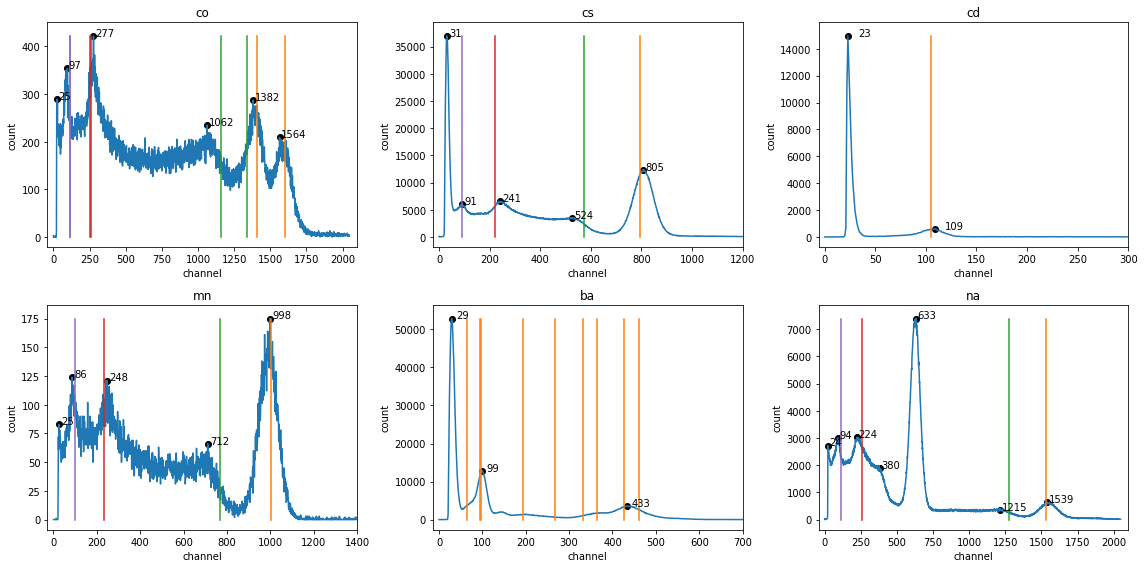

In [20]:
def customplot(ax, element, xmax=2100, compton=False):
    data = element_to_data[element]
    peaks = element_to_peaks[element]
    photopeaks = element_to_photopeaks[element]
    
    ax.plot(data[:,0], data[:,1])
    ax.scatter(peaks, data[:,1][peaks], c='k')
    
    ymax = max(data[:,1])
    for photopeak in photopeaks:
        ax.plot([photopeak*scale,photopeak*scale], [0,ymax], c='C1')
        
        if compton:
            energy = photopeak * 1e6 * q_e 
            edge = eTransfer(energy) / (1e6 * q_e)
            ax.plot([edge*scale,edge*scale], [0,ymax], c='C2')
            
            backscatter = photopeak - edge
            ax.plot([backscatter*scale,backscatter*scale], [0,ymax], c='C3')
            
            energy = backscatter * 1e6 * q_e 
            edge1 = eTransfer(energy) / (1e6 * q_e)
            ax.plot([edge1*scale,edge1*scale], [0,ymax], c='C4')

    
    ax.set_title(element)
    ax.set_xlabel('channel')
    ax.set_ylabel('count')
    ax.set_xlim([-xmax/50,xmax])
    
    for peak, annotation in zip(peaks, peaks):
        ax.annotate(annotation, (peak+10, data[peak,1]))

fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(16,8))

customplot(axs[0,0], 'co', compton=True)
customplot(axs[0,1], 'cs', 1200, compton=True)
customplot(axs[0,2], 'cd', 300)
customplot(axs[1,0], 'mn', 1400, compton=True)
customplot(axs[1,1], 'ba', 700)
customplot(axs[1,2], 'na', compton=True)

fig.tight_layout()

Here orange lines are the photopeaks, the green lines are the compton edge, red lines are the photopeak and purple lines are the compoton edges formed by the backscatter

For Na, there seems to be a peak around 633 channel. This corresponds to roughly 0.5MeV based on our scaling. This is most likely from the positron annihilation and producing gamma rays of 0.511MeV that then gets detected by the detector. 

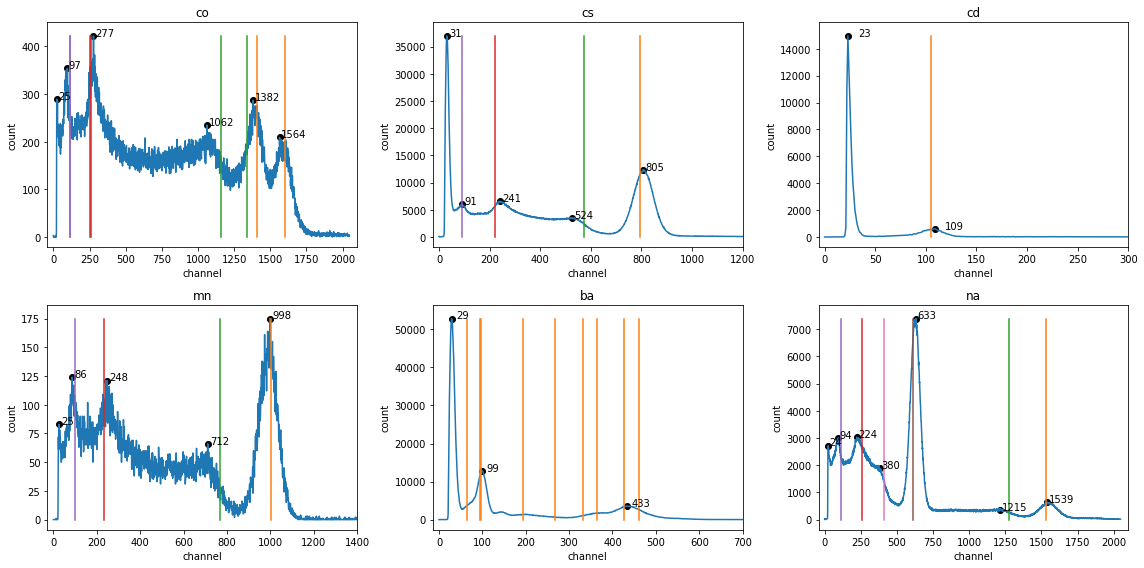

In [21]:
def customplot(ax, element, xmax=2100, compton=False, positron=False):
    data = element_to_data[element]
    peaks = element_to_peaks[element]
    photopeaks = element_to_photopeaks[element]
    
    ax.plot(data[:,0], data[:,1])
    ax.scatter(peaks, data[:,1][peaks], c='k')
    
    ymax = max(data[:,1])
    for photopeak in photopeaks:
        ax.plot([photopeak*scale,photopeak*scale], [0,ymax], c='C1')
        
        if compton:
            energy = photopeak * 1e6 * q_e 
            edge = eTransfer(energy) / (1e6 * q_e)
            ax.plot([edge*scale,edge*scale], [0,ymax], c='C2')
            
            backscatter = photopeak - edge
            ax.plot([backscatter*scale,backscatter*scale], [0,ymax], c='C3')
            
            energy = backscatter * 1e6 * q_e 
            edge1 = eTransfer(energy) / (1e6 * q_e)
            ax.plot([edge1*scale,edge1*scale], [0,ymax], c='C4')
            
    if positron:
        posipeak = 0.511
        ax.plot([posipeak*scale,posipeak*scale], [0,ymax], c='C5')   

        energy = 0.511 * 1e6 * q_e 
        edge = eTransfer(energy) / (1e6 * q_e)
        ax.plot([edge*scale,edge*scale], [0,ymax], c='C6')   
        
    ax.set_title(element)
    ax.set_xlabel('channel')
    ax.set_ylabel('count')
    ax.set_xlim([-xmax/50,xmax])
    
    for peak, annotation in zip(peaks, peaks):
        ax.annotate(annotation, (peak+10, data[peak,1]))

fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(16,8))

customplot(axs[0,0], 'co', compton=True)
customplot(axs[0,1], 'cs', 1200, compton=True)
customplot(axs[0,2], 'cd', 300)
customplot(axs[1,0], 'mn', 1400, compton=True)
customplot(axs[1,1], 'ba', 700)
customplot(axs[1,2], 'na', compton=True, positron=True)

fig.tight_layout()

The brown line represents the peak produced by the gamma rays from the positron annihilation. These gamma rays also seems to have a compton edge (in pink).

# Week 2

Jan 20. 2020 Jason Peng

Going to regather the data with some changes

Increase the time for Mn54 and Co60 because it is quite blurry. 
Increase gain for Ba and Cd so the spectrums can be seen easier
Scan with nothing to gather a background spectrum.

# Post Week 2

## Analysis

In [22]:
data_folder = "data/week2/"

element_to_csv = {
    "co":os.path.join(data_folder, 'co60_cg4_fg13.csv'),
    "cs":os.path.join(data_folder, 'cs137_cg4_fg13.csv'),
    "cd":os.path.join(data_folder, 'cd109_cg4_fg13.csv'),
    "mn":os.path.join(data_folder, 'mn54_cg4_fg13.csv'),
    "ba":os.path.join(data_folder, 'ba133_cg4_fg13.csv'),
    "na":os.path.join(data_folder, 'na22_cg4_fg13.csv'),
    "ba_detail":os.path.join(data_folder, 'ba133_cg8_fg18.csv'),
    "cd_detail":os.path.join(data_folder, 'cd109_cg64_fg249.csv'),
}

element_to_data = {}
for k,v in element_to_csv.items():
    element_to_data[k] = read_csv(v)

### Check gain scaling

Want to see if directly scaling the detailed spectrums for Ba and Cd will give us the original ones. If so, we can use the detailed ones directly for a more accurate measurement

Relative scaling for Ba is:  2.769230769230769
Relative scaling for Cd is:  30.646153846153847


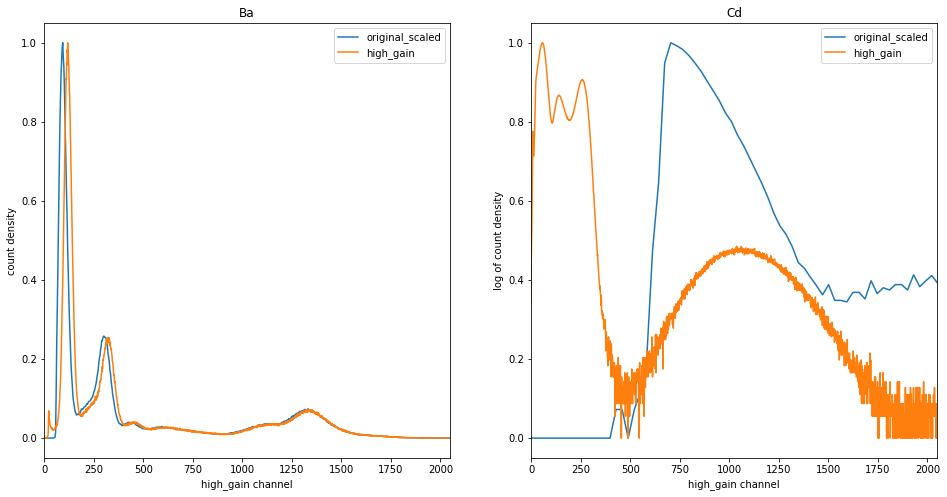

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))

ax = axs[0]
data = element_to_data["ba"]
scale = (8*1.8)/(4*1.3)
ax.plot(data[:,0]*scale, data[:,1]/max(data[:,1]), label="original_scaled")

data = element_to_data["ba_detail"]
ax.plot(data[:,0], data[:,1]/max(data[:,1]), label="high_gain")

ax.set_xlim([0,2048])
ax.set_xlabel("high_gain channel")
ax.set_ylabel("count density")
ax.set_title("Ba")
ax.legend()

print("Relative scaling for Ba is: ", scale)

ax = axs[1]
data = element_to_data["cd"]
scale = (64*2.49)/(4*1.3)
ax.plot(data[:,0]*scale, np.log(data[:,1]+1)/max(np.log(data[:,1]+1)), label="original_scaled")

data = element_to_data["cd_detail"]
ax.plot(data[:,0], np.log(data[:,1]+1)/max(np.log(data[:,1]+1)), label="high_gain")

ax.set_xlim([0,2048])
ax.set_xlabel("high_gain channel")
ax.set_ylabel("log of count density")
ax.set_title("Cd")
ax.legend()

print("Relative scaling for Cd is: ", scale)


Relative scaling for Ba is:  2.9
Relative scaling for Cd is:  8


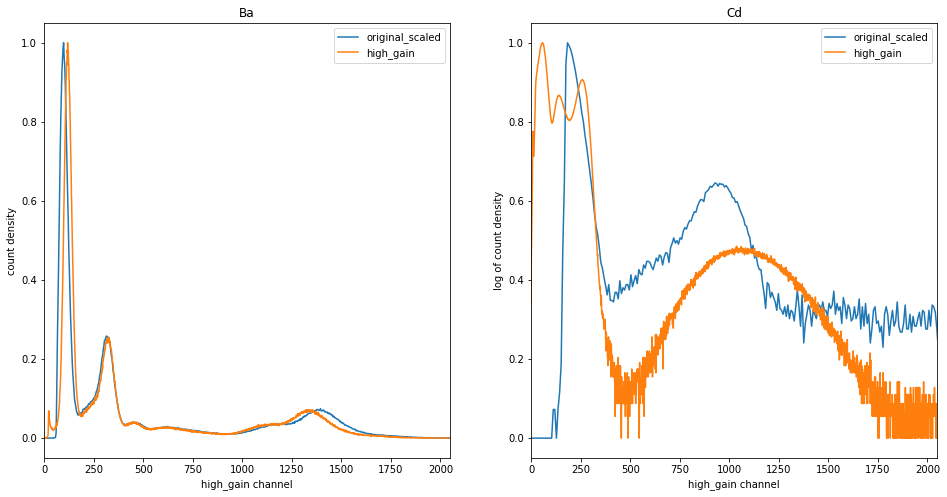

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))

ax = axs[0]
data = element_to_data["ba"]
scale = 2.9 # 2.769230769230769
ax.plot(data[:,0]*scale, data[:,1]/max(data[:,1]), label="original_scaled")

data = element_to_data["ba_detail"]
ax.plot(data[:,0], data[:,1]/max(data[:,1]), label="high_gain")

ax.set_xlim([0,2048])
ax.set_xlabel("high_gain channel")
ax.set_ylabel("count density")
ax.set_title("Ba")
ax.legend()

print("Relative scaling for Ba is: ", scale)

ax = axs[1]
data = element_to_data["cd"]
scale = 8
ax.plot(data[:,0]*scale, np.log(data[:,1]+1)/max(np.log(data[:,1]+1)), label="original_scaled")

data = element_to_data["cd_detail"]
ax.plot(data[:,0], np.log(data[:,1]+1)/max(np.log(data[:,1]+1)), label="high_gain")

ax.set_xlim([0,2048])
ax.set_xlabel("high_gain channel")
ax.set_ylabel("log of count density")
ax.set_title("Cd")
ax.legend()

print("Relative scaling for Cd is: ", scale)


It is interesting that the scaling for the Cd is so off. Furthermore, it can be seen in both graphs that a linear scaling will not fix the fact that the graph doese not match. This can be most clearly seen in the case of Cd. Increasing the scaling will move the lower peak of the original further away from the high_gain's lower peak. Decreasing the scaling will move the higher peak of the original further away from the high_gain's higher peak. Either way, the scaling will not result in the two graphs matching.

Furthermore, the shape of the graph for Cd differs quite drastically. The high gain shows that the lower peak in fact has 3 peaks. In addition, the magnitude of the higher peak decreased quite significantly (Notice this is in log scale)

## Results

## Conclusion